In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt    

In [7]:
image_1 = cv2.imread('doc1.bmp', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('doc2.bmp', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('doc3.bmp', cv2.IMREAD_GRAYSCALE)
image_ex = cv2.imread('pout.bmp', cv2.IMREAD_GRAYSCALE)

[ WARN:0@602.253] global /croot/opencv-suite_1691620365762/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('pout.bmp'): can't open/read file: check file path/integrity


# Normaliza

In [8]:

def binarize(img, threshold):
    img = img.copy()
    img[img < threshold] = 0
    img[img >= threshold] = 255
    return img

def plot(original_image, binarized_image):
    fig, axs = plt.subplots(1, 2, figsize=(13, 13))
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(binarized_image, cmap='gray')
    axs[1].set_title('Binarized')
    plt.show()
    
def plot_histogram(titles, histograms, L):
    
    fig, axs = plt.subplots(1, len(histograms), figsize=(12, 5))
    
    for i in range(len(histograms)):
        axs[i].stairs(histograms[i].ravel(), color='k')
        axs[i].set_title(titles[i])
        axs[i].set_xlim([0, L])
        axs[i].set_xlabel('Intensidade do Pixel')
        axs[i].set_ylabel('Número de Pixels')
    plt.tight_layout()
    plt.show()
    

In [9]:
def histogram(image):
    L = np.iinfo(image.dtype).max + 1 
    return cv2.calcHist(
        [image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )

In [10]:
def root_squared_filter(image):
    image = image.copy()
    # Converte para float64 para evitar underflow e divide por 255
    image = image.astype(np.float64)/255.
    # Aplica a raiz quadrada em cada pixel da imagem
    image = np.sqrt(image)
    # Desnormaliza a imagem
    image = image*255.
    # Converte para uint8
    image = image.astype(np.uint8)
    return image

In [11]:
def mvca_binarization_2(image):
    L = np.iinfo(image.dtype).max + 1 
    histogram = cv2.calcHist(
        [image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )   
    
    t = np.quantile(image, 0.10)
    binarized_image = binarize(image, t)

    histogram_binarized = cv2.calcHist(
        [binarized_image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )

    plot_histogram(['Original', 'Binarized'], [histogram, histogram_binarized], L)
    
    print('Ponto de corte:', t)
    plot(image, binarized_image)
    


In [12]:
image_1_root = root_squared_filter(image_1)
image_2_root = root_squared_filter(image_2)
image_3_root = root_squared_filter(image_3)

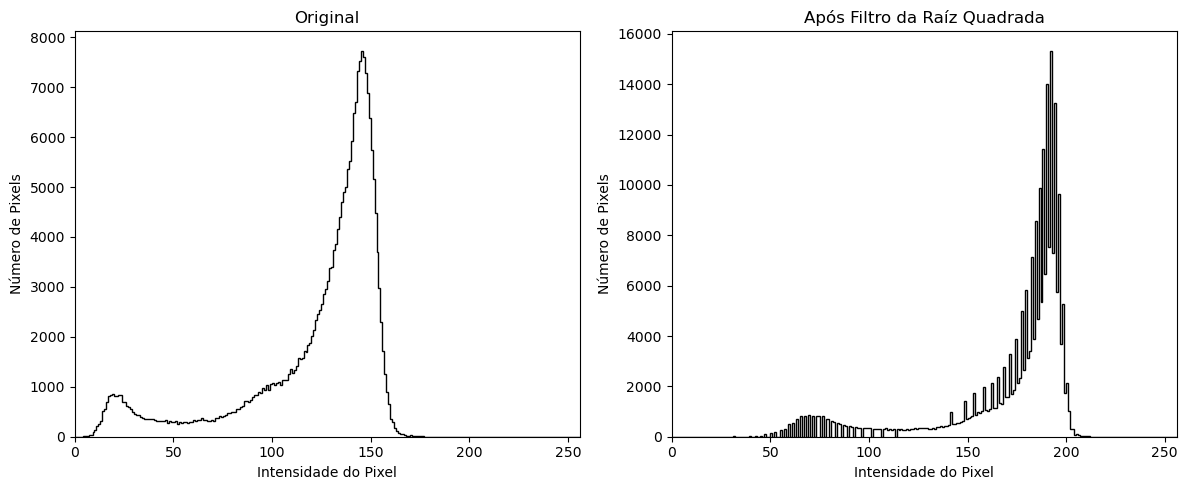

In [59]:
plot_histogram(['Original', 'Após Filtro da Raíz Quadrada'], [histogram(image_1), histogram(image_1_root)], 256)

# Imagem 1

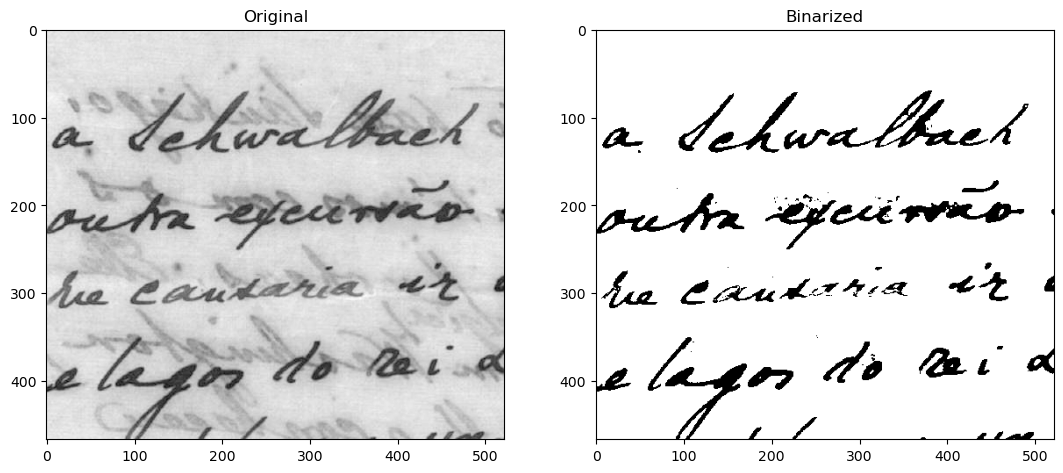

In [66]:
plot(image_1_root, binarize(image_1_root, 118)) #125 142

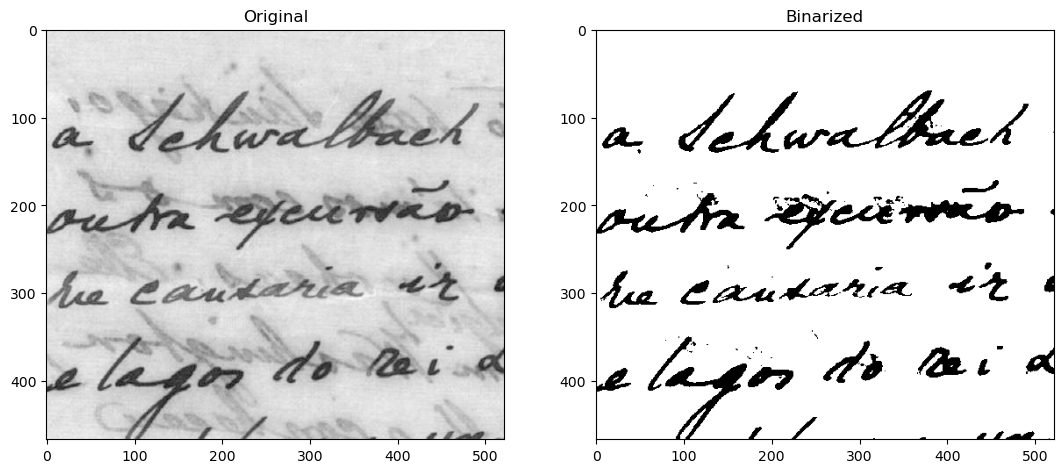

In [51]:
plot(image_1_root, binarize(image_1_root, 125)) #125 142

# Imagem 2

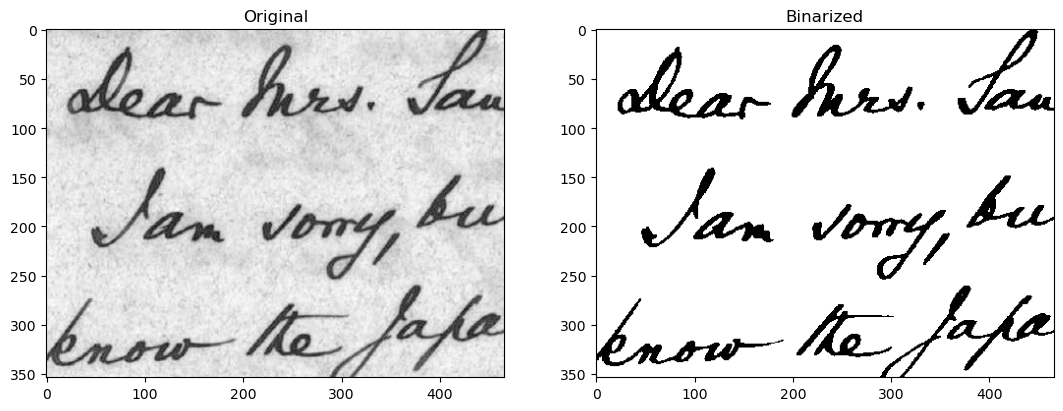

In [34]:
plot(image_2_root, binarize(image_2_root, 125)) #125 142

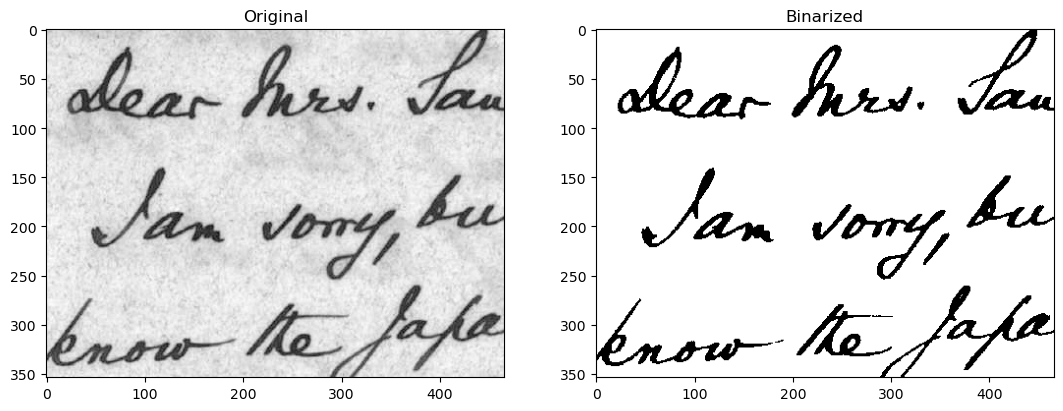

In [52]:
plot(image_2_root, binarize(image_2_root, 120)) #125 142

# Imagem 3

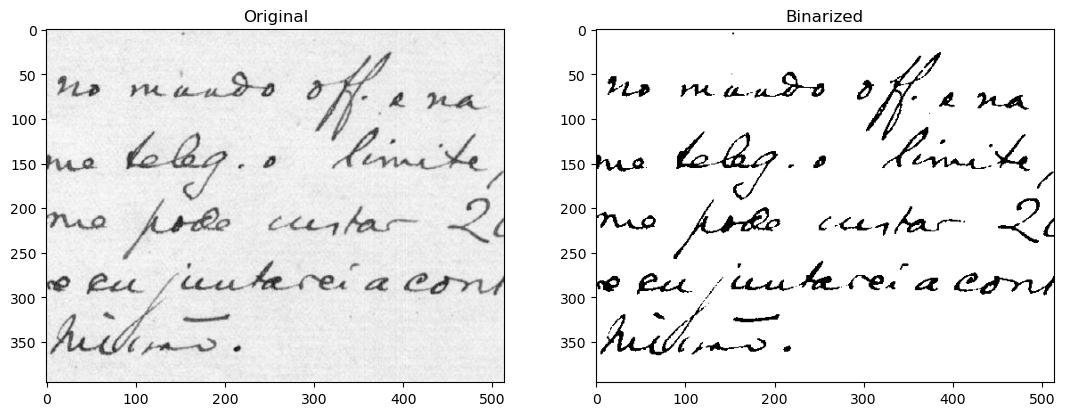

In [58]:
plot(image_3_root, binarize(image_3_root, 170)) #170 #125 142

# Função construída

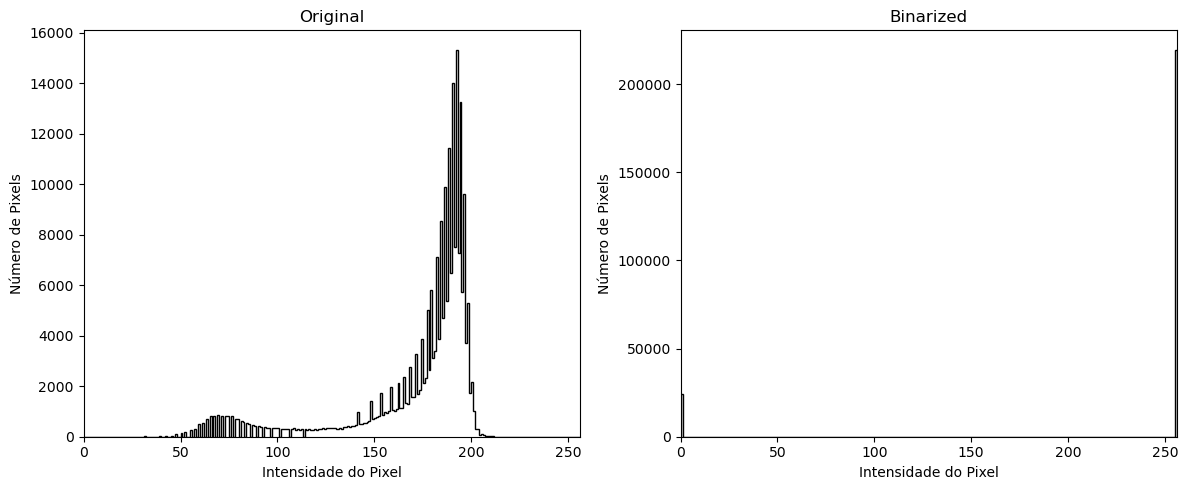

Ponto de corte: 129.0


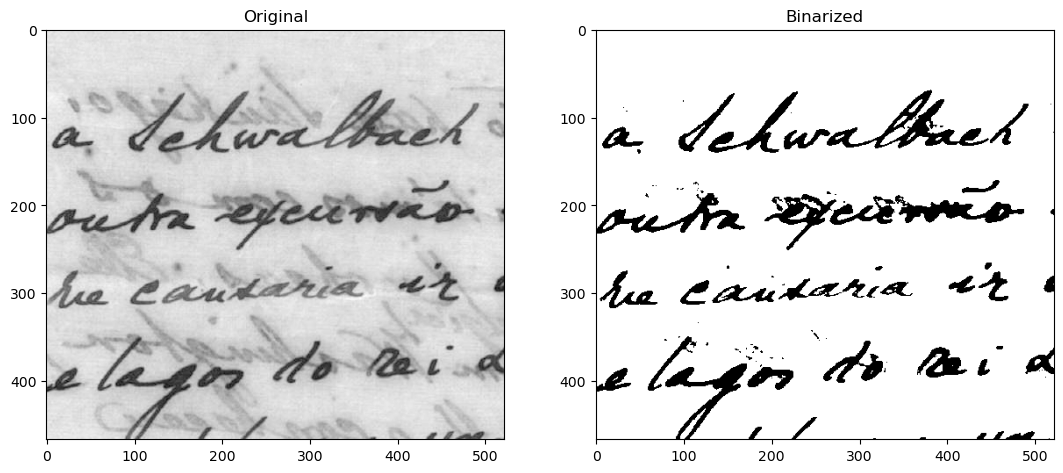

In [46]:
mvca_binarization_2(image_1_root)

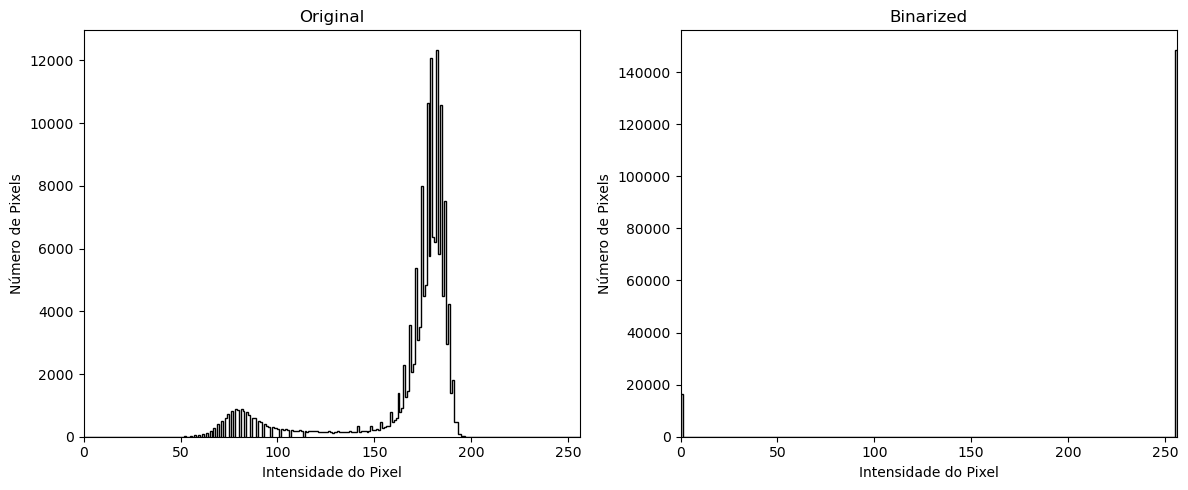

Ponto de corte: 121.0


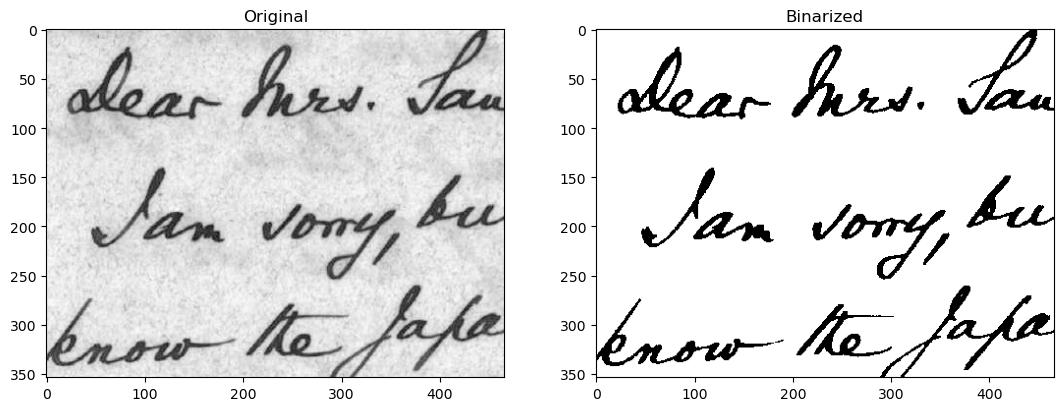

In [47]:
mvca_binarization_2(image_2_root)

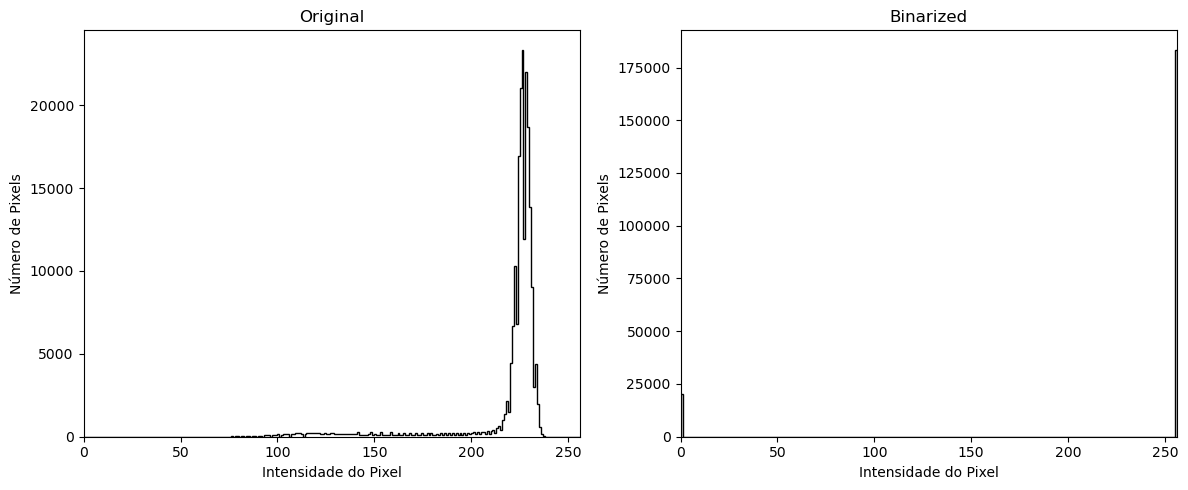

Ponto de corte: 211.0


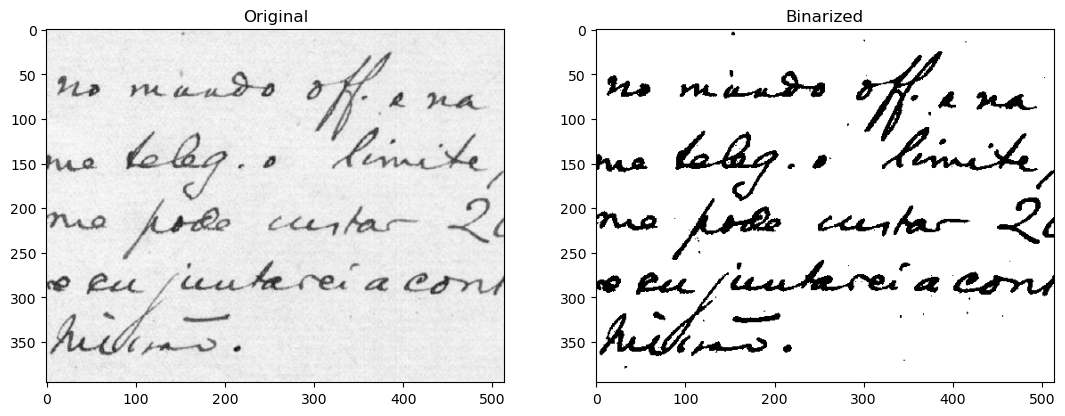

In [48]:
mvca_binarization_2(image_3_root)